<a href="https://colab.research.google.com/github/jeya014/Intelligent-Garbage-Classification-using-Deep-Learning/blob/main/nma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = {
    'Hours_Studied': [2, 3, 4, 5, 6, 1, 7, 3, 5, 8],
    'Attendance_Percentage': [80, 85, 90, 70, 95, 60, 100, 75, 85, 98],
    'Previous_Scores': [60, 70, 65, 80, 90, 50, 95, 55, 75, 85],
    'Final_Score': [65, 70, 68, 78, 85, 55, 92, 60, 80, 88]
}
df = pd.DataFrame(data)

In [3]:
print("Dataset Summary:")
print(df.describe())

Dataset Summary:
       Hours_Studied  Attendance_Percentage  Previous_Scores  Final_Score
count      10.000000              10.000000        10.000000    10.000000
mean        4.400000              83.800000        72.500000    74.100000
std         2.221111              12.821856        15.138252    12.395788
min         1.000000              60.000000        50.000000    55.000000
25%         3.000000              76.250000        61.250000    65.750000
50%         4.500000              85.000000        72.500000    74.000000
75%         5.750000              93.750000        83.750000    83.750000
max         8.000000             100.000000        95.000000    92.000000


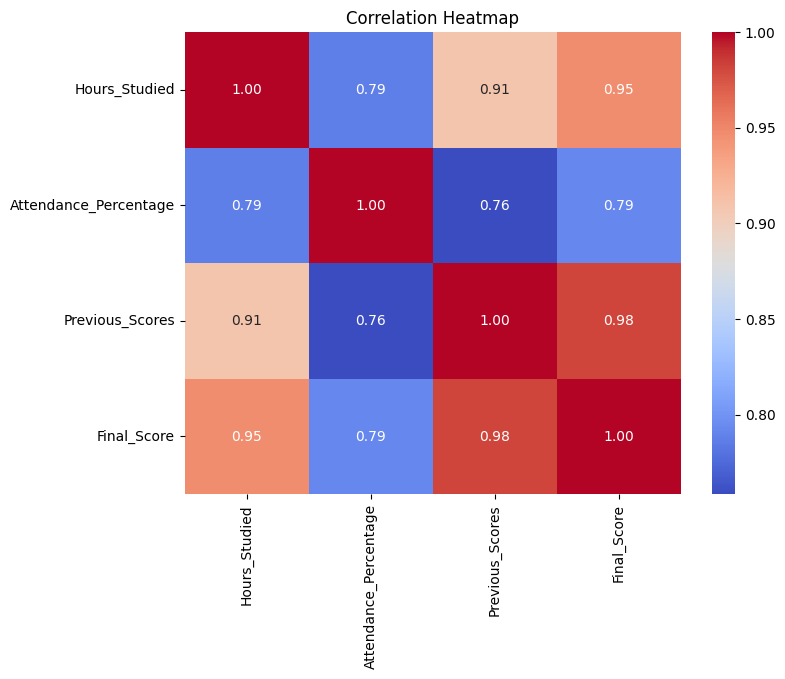

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

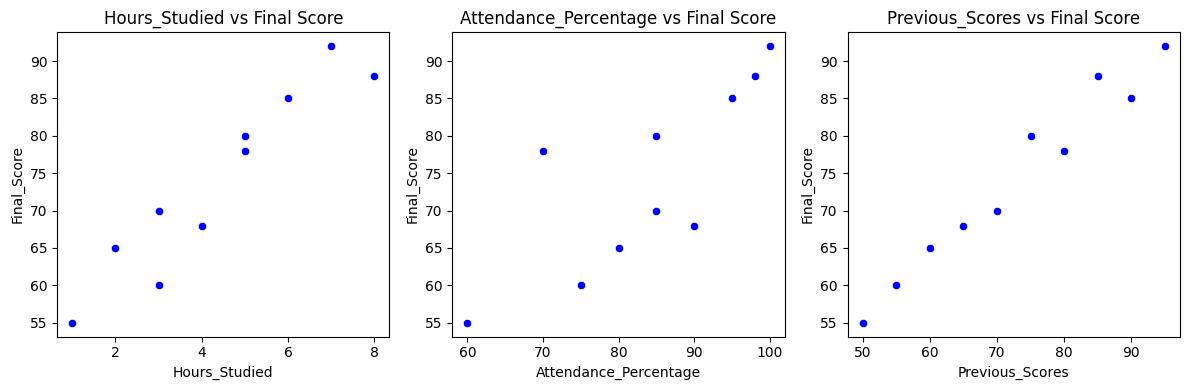

In [5]:
plt.figure(figsize=(12, 4))
for i, column in enumerate(['Hours_Studied', 'Attendance_Percentage', 'Previous_Scores']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=column, y='Final_Score', color='blue')
    plt.title(f'{column} vs Final Score')
plt.tight_layout()
plt.show()

In [6]:
X = df[['Hours_Studied', 'Attendance_Percentage', 'Previous_Scores']]
y = df['Final_Score']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Model Coefficients:
Intercept: 20.118482494792254
Coefficients: [1.38416981 0.06679935 0.57756731]


In [11]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Model Evaluation:
Mean Absolute Error (MAE): 1.65


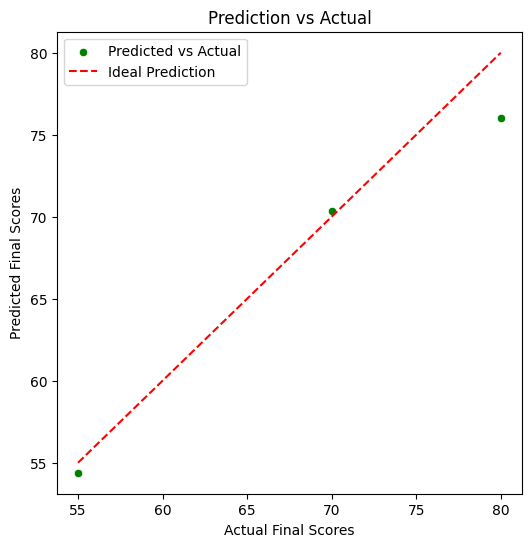

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Final Scores")
plt.ylabel("Predicted Final Scores")
plt.legend()
plt.title("Prediction vs Actual")
plt.show()